<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [203]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, jaccard_score, accuracy_score
import random

%matplotlib inline

# About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets plot some columns to underestand data better:

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

## Preprocessing

I want to first do my own preprocessing to do a train test split and make one-hot encoding. That way, it's not such a blackbox

In [201]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, accuracy_score, log_loss


def train_test_split_pandas(df, x_cols=[],y_cols=[], test=0.2):
    '''
    split dataframe into train_test, 
    
    if no x_cols or y_col is supplied, then the dataframe will just be split into train_test df
    
    if x_cols and y_cols is supplied it will return 4 arrays, train_x, test_x, train_y, test_y
    
    '''
    train_df = df.sample(int((1-test)*len(df)))
    test_df = df[~df.index.isin(train_df.index)]
    if not x_cols:
        return train_df, test_df

    else:
        return train_df[x_cols].to_numpy(),train_df[y_cols].to_numpy().ravel(),test_df[x_cols].to_numpy(),test_df[y_cols].to_numpy().ravel()

def make_one_hot_encoding(df, categories,drop=True):
    '''
    
    Hot encode categorical
    
    returns: dataframe
    
    args:categories - the categories in the df that you want to encode
    args:drop - drop the parent categories you encoded?
    
    '''
    for cat in categories:
        #get all values associated with that category
        values_per_cat = df[cat].unique()
        
        #iterate through categories
        for label in values_per_cat:
            #default set to 0
            label_token = cat + '_' + str(label)
            df[label_token] = 0
            #if that cat contains that label, set to 1
            df.loc[df[cat]==label,label_token]=1
    if drop:
        #if drop, drop the categories we OHE from
        df.drop(categories,axis=1,inplace=True)
    return df
              
def get_datasets(url):
    

    #Read in dataset
    loan_df = pd.read_csv(url)

    #cast to datetime
    loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])
    loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])

    #Find out which day of week effecteive date was on
    loan_df['effective_date_dayofweek'] = loan_df['effective_date'].dt.day_name()

    loan_df['Weekend'] = 0
    loan_df.loc[loan_df['effective_date_dayofweek'].isin(['Friday','Saturday','Sunday']),'Weekend'] = 1
    #loan_df['due_date_dayofweek'] = loan_df['due_date'].dt.day_name()


    #Hot encode categorical data
    hot_encoding_df = make_one_hot_encoding(loan_df, ['Gender','education']).drop(
        ['Unnamed: 0','Unnamed: 0.1','effective_date','due_date','effective_date_dayofweek'],axis=1)

    return hot_encoding_df
    
train_csv_url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv"
test_csv_url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv"

hot_encoding_df_train = get_datasets(train_csv_url)
hot_encoding_df_test = get_datasets(test_csv_url)

## KNN Execution

In [209]:
#get X feature columns
feature_columns = list(hot_encoding_df_train.drop('loan_status',axis=1).columns)

#Depedent feature
dependent_feature = 'loan_status'
print("Using\n{}\nFeatures".format("|".join(feature_columns)))

feature_sets = []
for minimum_features in range(4,len(feature_columns)+1):
    for c in itertools.combinations(feature_columns,minimum_features):
        feature_sets.append(list(c))

Using
Principal|terms|age|Weekend|Gender_male|Gender_female|education_High School or Below|education_Bechalor|education_college|education_Master or Above
Features


In [210]:
##Initiate a list to store results
knn_plotting_dataframe = []

z

In [211]:
#change dataframe into a plotting frame
knn_plotting_dataframe = pd.DataFrame(knn_plotting_dataframe)

In [226]:
knn_plotting_dataframe['fs_str'] = knn_plotting_dataframe['fs'].apply(lambda x: '|'.join(x))

In [229]:
knn_plotting_dataframe.groupby(['fs_str','k']).mean().sort_values('accuracy')[::-1]

repeat  accuracy  \
fs_str                                             k                      
Principal|age|Gender_male|education_High School... 17       5  0.790476   
                                                   19       5  0.790476   
Principal|age|Gender_male|Gender_female|educati... 17       5  0.790476   
Principal|age|Gender_male|education_High School... 18       5  0.790476   
Principal|age|Gender_male|Gender_female|educati... 19       5  0.788889   
...                                                       ...       ...   
Principal|terms|age|education_High School or Below 2        5  0.458730   
Principal|age|Gender_male|Gender_female|educati... 2        5  0.458730   
Principal|Gender_male|Gender_female|education_c... 2        5  0.452381   
Principal|terms|age|Gender_male|Gender_female|e... 2        5  0.444444   
Gender_male|Gender_female|education_High School... 2        5  0.398413   

                                                        jaccard        f1  
fs_str                                             k                       
Principal|age|Gender_male|education_High School... 17  0.790476  0.882792  
                                                   19  0.790476  0.882792  
Principal|age|Gender_male|Gender_female|educati... 17  0.790131  0.882496  
Principal|age|Gender_male|education_High School... 18  0.790476  0.882792  
Principal|age|Gender_male|Gender_female|educati... 19  0.788889  0.881709  
...                                                         ...       ...  
Principal|terms|age|education_High School or Below 2   0.402710  0.571804  
Principal|age|Gender_male|Gender_female|educati... 2   0.404920  0.574708  
Principal|Gender_male|Gender_female|education_c... 2   0.358263  0.502741  
Principal|terms|age|Gender_male|Gender_female|e... 2   0.377748  0.547035  
Gender_male|Gender_female|education_High School... 2   0.252814  0.367282  

[16112 rows x 4 columns]

In [236]:
feature_winner = "Principal|age|Gender_male|education_High School or Below|education_Bechalor|education_Master or Above".split('|')

knn_plotting_dataframe=[]
##Repeat with different sampling of training and get the standard deviation
for repeat in range(1,10):
    #train test split
    train_x, train_y, test_x, test_y = train_test_split_pandas(hot_encoding_df_train,x_cols=feature_winner, y_cols=dependent_feature)

    #Normalize X data
    train_x_normal = preprocessing.StandardScaler().fit_transform(train_x)
    test_x_normal = preprocessing.StandardScaler().fit_transform(test_x)

    ##Test up to 30 ks
    for k in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_x_normal, train_y)

        #get predicted ys
        y_hat_train = knn.predict(train_x_normal)
        y_hat_test = knn.predict(test_x_normal)

        #Accuracy can be assessed with categorical data
        accuracy = accuracy_score(test_y,y_hat_test)


        ###Change classes i.e. COLLECTION, PAIDOFF into a binary
        label_encoder = preprocessing.LabelEncoder()

        #fit it on the test data
        le = label_encoder.fit(test_y)

        #transform test_y and y_hat_test into a binary representation
        test_y_binary = le.transform(test_y)
        y_hat_test_binary = le.transform(y_hat_test)

        #Make sure the accuracy score from the classification is the same as the label encoded
        assert(accuracy_score(test_y_binary,y_hat_test_binary) == accuracy)

        #get jacard and f1
        jaccard = jaccard_score(test_y_binary,y_hat_test_binary)
        f1 = f1_score(test_y_binary,y_hat_test_binary)

        ##add results to dataframe
        knn_plotting_dataframe.append(
            {
                'repeat': repeat,
                'k':k,
                'accuracy':accuracy,
                'jaccard':jaccard,
                'f1':f1
            }
        )


,repeat,accuracy,jaccard,f1
k,,,,
29,5,0.747619,0.747619,0.85459
28,5,0.747619,0.747619,0.85459
27,5,0.747619,0.747619,0.85459
26,5,0.747619,0.747619,0.85459
25,5,0.747619,0.747619,0.85459


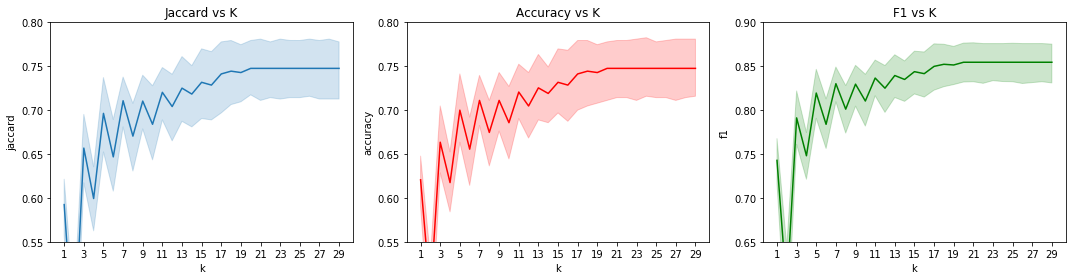

In [237]:
#change dataframe into a plotting frame
knn_plotting_dataframe = pd.DataFrame(knn_plotting_dataframe)

##Plot the Ks vs accuracy,jaccard,f1
fig,axes = plt.subplots(1,3,sharex=True,sharey=False,figsize=(15,4))
ax = axes.flatten()
ax[0].set_ylim(0.55,0.8)
sns.lineplot(data=knn_plotting_dataframe,x='k',y='jaccard',ax=ax[0],legend=False)
ax[0].set_title('Jaccard vs K')
sns.lineplot(data=knn_plotting_dataframe,x='k',y='accuracy',ax=ax[1],color='red',legend=False)
ax[0].set_xticks(range(1,31,2))
ax[1].set_title('Accuracy vs K')
ax[1].set_ylim(0.55,0.8)
sns.lineplot(data=knn_plotting_dataframe,x='k',y='f1',ax=ax[2],color='green',legend=False)
ax[2].set_title('F1 vs K')
ax[2].set_ylim(0.65,0.90)
fig.tight_layout()

knn_plotting_dataframe.groupby('k').mean().sort_values(['accuracy'])[::-1].head(5)

>Looks like the best K for this feature set is around 7-9

In [238]:
##Training Datasets 
knn_plotting_dataframe.loc[knn_plotting_dataframe['k'] == 19].groupby('k').mean()

,repeat,accuracy,jaccard,f1
k,,,,
19,5,0.742857,0.742857,0.85148


In [239]:
##Get training data without split
train_x = hot_encoding_df_train[feature_winner].to_numpy()
train_y = hot_encoding_df_train[dependent_feature].to_numpy()
train_x_normal = preprocessing.StandardScaler().fit_transform(train_x)


#Official testing dataframe
official_test_x = hot_encoding_df_test[feature_winner].to_numpy()
official_test_y = hot_encoding_df_test[dependent_feature].to_numpy()
official_test_x_normal = preprocessing.StandardScaler().fit_transform(official_test_x)

knn = KNeighborsClassifier(n_neighbors=5,algorithm='brute')
knn.fit(train_x_normal, train_y)
y_hat = knn.predict(official_test_x_normal)

##accuracy_score
print(accuracy_score(official_test_y,y_hat))

##jacard
###Change classes i.e. COLLECTION, PAIDOFF into a binary
label_encoder = preprocessing.LabelEncoder()

#fit it on the test data
le = label_encoder.fit(official_test_y)

#transform test_y and y_hat_test into a binary representation
official_test_y_binary = le.transform(official_test_y)
y_hat_binary = le.transform(y_hat)

print(jaccard_score(official_test_y_binary,y_hat_binary))

0.7222222222222222
0.7169811320754716


In [241]:
y_hat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

# Decision Tree

# Support Vector Machine

# Logistic Regression

# Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [11]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-30 23:06:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2019-11-30 23:06:20 (248 MB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation 

In [12]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>